<a href="https://colab.research.google.com/github/RAVIKUMARBALIJA/DBSCAN_Clustering/blob/main/DBSCAN_ClusteringAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [35]:
import requests,io,csv,os

In [43]:
dataset=pd.read_csv('/content/sample_data/Mall_Customers.csv')

In [44]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
dataset.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [46]:
dataset.rename(columns={'Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [48]:
dataset.head()

,CustomerID,Genre,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [51]:
data=dataset.iloc[:,[3,4]]

In [57]:
data.shape

(200, 2)

In [58]:
dbscan=DBSCAN(eps=3,min_samples=4)

In [59]:
model=dbscan.fit(data)

In [60]:
labels=model.labels_

In [62]:
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [64]:
sample_scores=np.zeros_like(labels)

In [65]:
sample_scores.shape

(200,)

In [67]:
n_clusters=len(set(labels))-(1 if -1 in labels else 0)

In [68]:
n_clusters

9

In [70]:
silhouette_score(data,labels)

-0.1908319132560097

In [79]:
labels_series=pd.DataFrame(labels)

In [80]:
data['labels']=labels_series

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
data.columns

Index(['Annual Income', 'Spending Score', 'labels'], dtype='object')

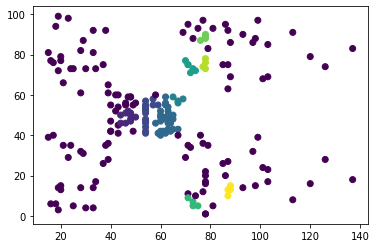

In [89]:
plt.scatter(x=data['Annual Income'],y=data['Spending Score'],c=data['labels'])

In [99]:
data_copy=data[data['labels']!=-1]

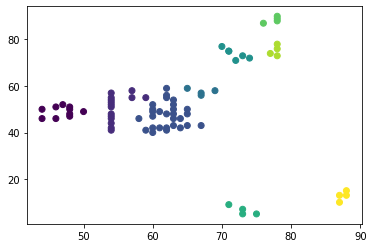

In [100]:
plt.scatter(x=data_copy['Annual Income'],y=data_copy['Spending Score'],c=data_copy['labels'])